In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path_to_train='Train/'
path_to_test='Test/'

In [4]:
X_train=np.load(path_to_train+"X_train.npy")
y_train=np.load(path_to_train+"y_train.npy")
X_test=np.load(path_to_test+"X_test.npy")
y_test=np.load(path_to_test+"y_test.npy")

Необходимо бороться с несбалансированностью классов. Для этого воспользуемся методом NearMiss, который случайным образом избавляется от представителей классов, кототые преобладают в наборе данных. Данный метод уменьшает набор данных, что приведёт к более быстрому выполнению программы.

In [5]:
from imblearn.under_sampling import NearMiss

In [6]:
nm=NearMiss()
X_train_miss, y_train_miss=nm.fit_resample(X_train, y_train)

In [7]:
print(X_train_miss.shape, y_train_miss.shape)

(7405, 12000) (7405,)


## Нейронные сети

In [8]:
from sklearn.neural_network import MLPClassifier

Посмотрим, как результат зависит от параметра регуляризации alpha.

In [12]:
%%time
alpha_arr = np.logspace(-4, 5, 10)
test_err = []
train_err = []
for alpha in alpha_arr:
    model = MLPClassifier(hidden_layer_sizes = (30,), random_state = 42, alpha = alpha)
    model.fit(X_train_miss, y_train_miss)

    y_train_pred = model.predict(X_train_miss)
    y_test_pred = model.predict(X_test)
    train_err.append(np.mean(y_train_miss != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Wall time: 2h 3min 36s


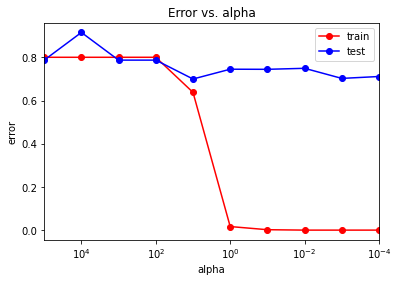

In [13]:
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

С уменьшением параметра alpha точность работы алгоритма на етстовой выборке резко возросла и стала стремиться к 0. На тестовой выборке снова ничего не изменилось. Ошибка держится около 80%.

Посмотрим, как менятется точность алгоритма в зависимости от количества нейронов.

In [23]:
number_arr=[]
for i in range (10,110,10):
    number_arr.append(i)

In [24]:
%%time
test_err = []
train_err = []
for number in number_arr:
    model = MLPClassifier(hidden_layer_sizes = (number,), random_state = 42)
    model.fit(X_train_miss, y_train_miss)

    y_train_pred = model.predict(X_train_miss)
    y_test_pred = model.predict(X_test)
    train_err.append(np.mean(y_train_miss != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Wall time: 2h 48min 52s


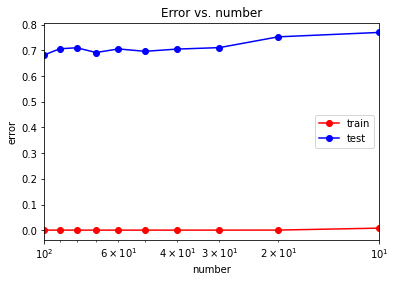

In [26]:
plt.semilogx(number_arr, train_err, 'r-o', label = 'train')
plt.semilogx(number_arr, test_err, 'b-o', label = 'test')
plt.xlim([np.max(number_arr), np.min(number_arr)])
plt.title('Error vs. number')
plt.xlabel('number')
plt.ylabel('error')
plt.legend()
pass

Видим, что ошибка на тестовой выборке при любом количетсве нейронов близка к 0, а на обучающей выборке всё попрежнему. При заданных параметрах ошибка попрежнему около 70-80%. Но можно заметить, чем больше количество нейронов, тем меньше ошибка.

Посмотрим, что будет, если у нейронной сети будет 2 скрытых слоя. Попробуем взять большое количество нейронов и маленькое значение alpha

In [10]:
model = MLPClassifier(hidden_layer_sizes = (1000,1000), alpha=0.0001,random_state = 42)
model.fit(X_train_miss, y_train_miss)

MLPClassifier(hidden_layer_sizes=(1000, 1000), random_state=42)

In [11]:
y_train_pred = model.predict(X_train_miss)
y_test_pred = model.predict(X_test)
np.mean(y_train_miss != y_train_pred), np.mean(y_test != y_test_pred)

(0.0002700877785280216, 0.7286176606564956)

Получили такой же результат: на обучающей выборке ошибка стремится к 0, на тестовой - около 70%